In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model  import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error,mean_absolute_error
from pmdarima import auto_arima
from keras.models import Sequential
from keras.layers import Dense, GRU,Dropout
from sklearn.preprocessing import MinMaxScaler


In [2]:
plt.style.use("fivethirtyeight")

Get Data

In [3]:
dataSet=pd.read_csv('./AAPL (1).csv')
dataSet["Date"] = pd.to_datetime(dataSet["Date"], infer_datetime_format=True)
dataset = dataSet.set_index("Date")

C:\Users\Ben Saadia Mohamed\AppData\Local\Temp\ipykernel_1772\425923718.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataSet["Date"] = pd.to_datetime(dataSet["Date"], infer_datetime_format=True)


Filter DataFrame

In [4]:
df=dataset["Close"]

Visualire DF

<Axes: title={'center': "AAPL 'Close'"}, xlabel='Date', ylabel='Close Price'>

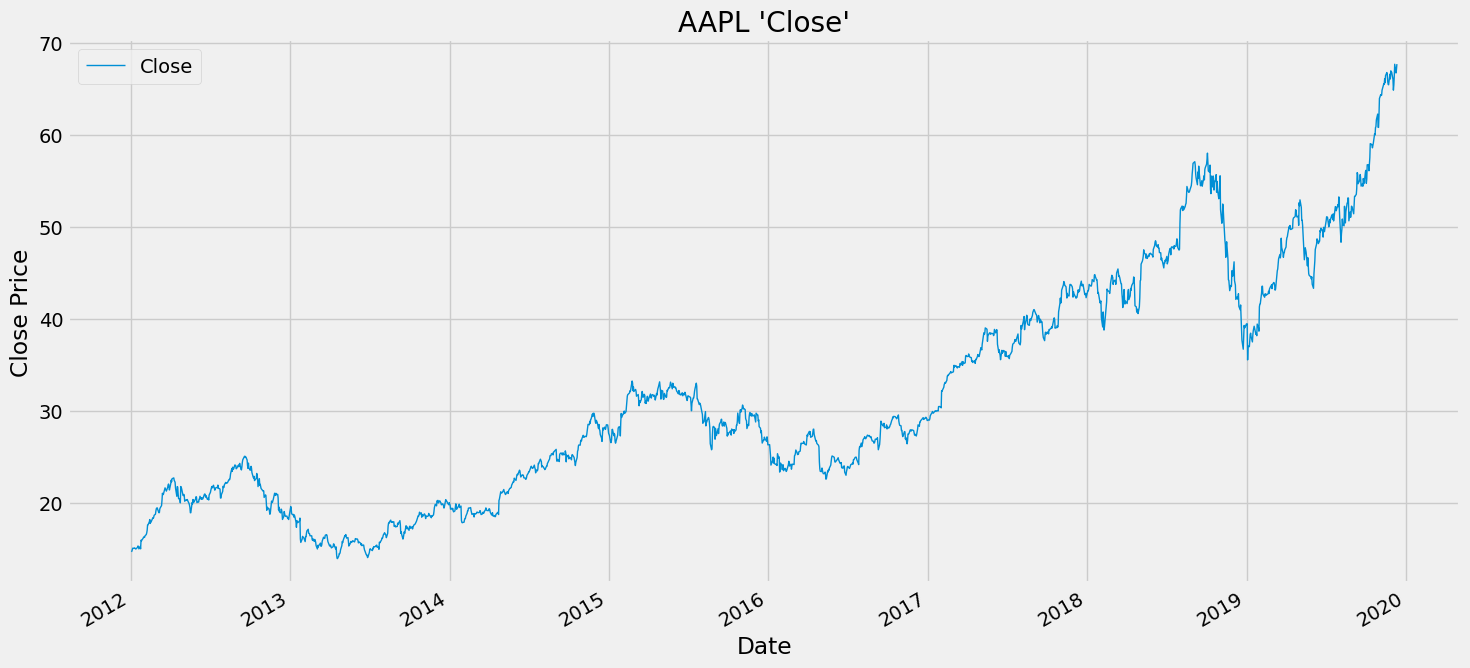

In [5]:
df.plot(figsize=(16,8),xlabel='Date',ylabel='Close Price',title="AAPL 'Close'",legend="Close",linewidth=1)

Get Number Of Train Data

In [6]:
len_data_train = math.floor(len(df)*.85)

Split Data


In [7]:
train=df[:len_data_train]
test=df[len_data_train:]

Plotting Train & Test Data

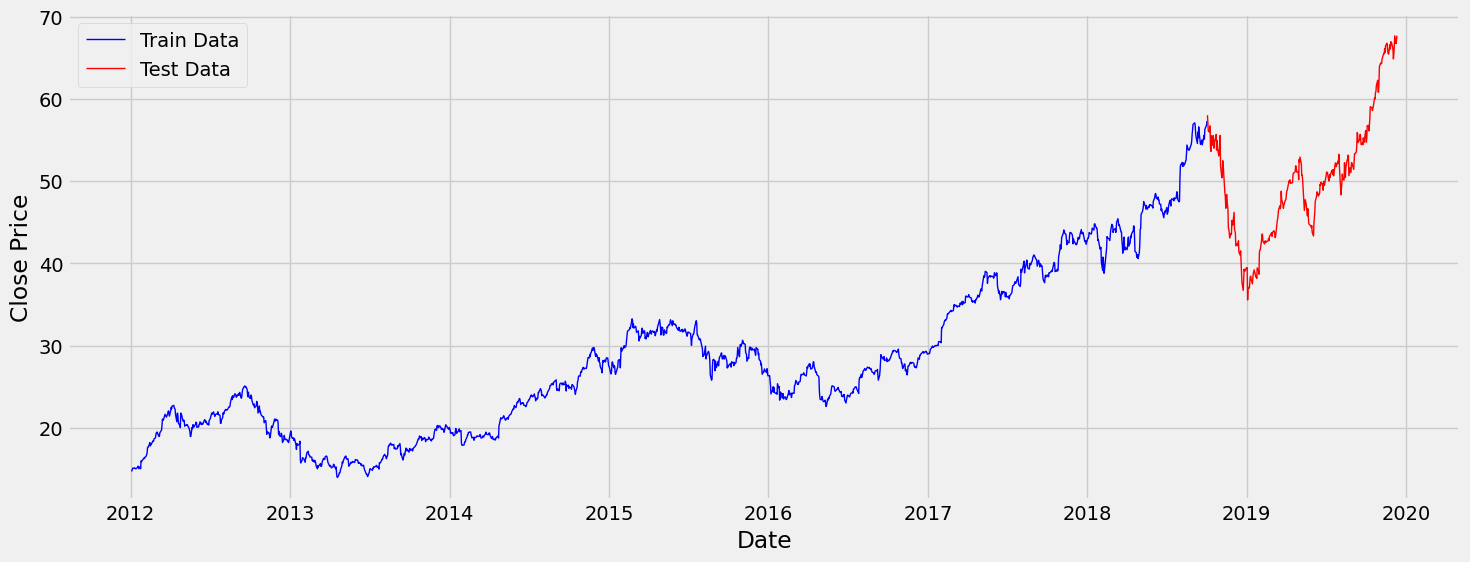

In [8]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(train,"blue",label="Train Data",linewidth=1)
plt.plot(test,"red",label="Test Data",linewidth=1)
plt.legend()
plt.show()

In [9]:
data_decompose=seasonal_decompose(df,model="additive",period=2)
concat=pd.concat([data_decompose.trend,data_decompose.seasonal,data_decompose.resid,data_decompose.observed],axis=1)
concat.columns = ["Trend","Seasonal","Resid","Actual_Values"]
concat

,Trend,Seasonal,Resid,Actual_Values
Date,,,,
2012-01-03,NaN,0.000612,NaN,14.686786
2012-01-04,14.786964,-0.000612,-0.020638,14.765714
2012-01-05,14.927678,0.000612,0.001352,14.929643
2012-01-06,15.040714,-0.000612,0.045612,15.085714
2012-01-09,15.081250,0.000612,-0.020076,15.061786
...,...,...,...,...
2019-12-05,66.475623,0.000612,-0.081238,66.394997
2019-12-06,67.119999,-0.000612,0.558111,67.677498
2019-12-09,67.064377,0.000612,-0.334986,66.730003


Arima Model

In [10]:
train_trend = data_decompose.trend[1:len_data_train]
test_trend = data_decompose.trend[len_data_train:-1]
stepwise_fit=auto_arima(train_trend,trace=True,suppress_warnings=True)
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2065.768, Time=6.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=341.721, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-663.107, Time=0.84 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=354.611, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.77 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.74 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=8.75 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.80 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.42 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.03 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.59 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=4.95 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 80.604 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1698
Model:               SARIMAX(2, 1, 2)   Log Likelihood                1038.884
Date:                Mon, 24 Apr 2023   AIC                          -2065.768
Time:                        16:39:13   BIC                          -2033.149
Sample:                             0   HQIC                         -2053.691
                               - 1698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0044      0.002      2.278      0.023       0.001       0.008
ar.L1          1.2606      0.057     22.007      0.000       1.148       1.373
ar.L2         -0.4614      0.025    -18.609      0.000      -0.510      -0.413
ma.L1          0.2567      0.059      4.353      0.000       0.141       0.372
ma.L2         -0.7211      0.065    -11.153      0.000      -0.848      -0.594
sigma2         0.0169      0.000     35.534      0.000       0.016       0.018
===================================================================================
Ljung-Box (L1) (Q):                  54.97   Jarque-Bera (JB):               753.97
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.13   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
prediction=[]
training_trend=list(train_trend)
testing_trend=list(test_trend)
n_test_obser=len(test_trend)
for n in range(n_test_obser):
    model=ARIMA(training_trend,order=(2,1,2))
    model_fit=model.fit()
    output=model_fit.forecast()
    prediction.append(output)
    training_trend.append(testing_trend[n])

c:\Users\Ben Saadia Mohamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Ben Saadia Mohamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ben Saadia Mohamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ben Saadia Mohamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge

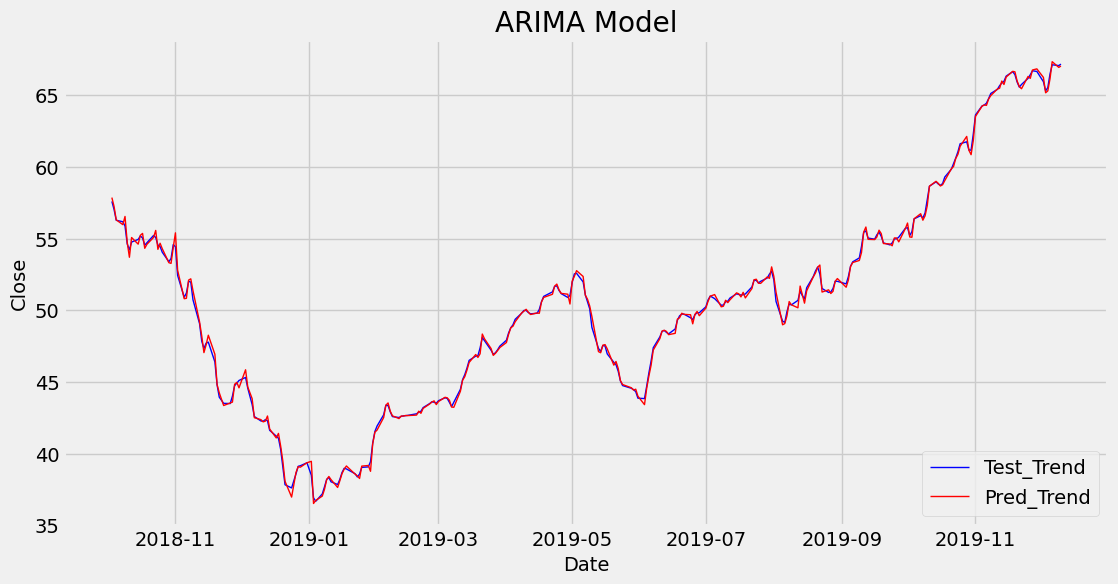

In [13]:
data_range=test_trend.index
plt.figure(figsize=(12, 6))
plt.title("ARIMA Model")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close", fontsize=14)
plt.plot(data_range,test_trend,"blue", linewidth=1)
plt.plot(data_range,prediction,"red",linewidth=1)
plt.legend(["Test_Trend", "Pred_Trend"], loc="lower right")
plt.show()

GRU Model

In [14]:
rsid_data = data_decompose.resid
rsid_data = rsid_data[1:-1]

In [15]:
# create the training data
train_data = rsid_data[0:len_data_train]
timestep = 60
# split the train data
x_train = []
y_train = []
for i in range(timestep, len(train_data)):
    x_train.append(train_data[i-timestep:i])
    y_train.append(train_data[i])

# convert the data to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [16]:
 # create the data test
test_data = rsid_data[len_data_train-timestep:]

# create x_test & y_test
x_test = []
y_test = rsid_data[len_data_train:]
for i in range(timestep, len(test_data)):
    x_test.append(test_data[i-timestep:i])

# convert the data to a numpy array
x_test = np.array(x_test)

# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
model = Sequential()
model.add(GRU(50, return_sequences=True,
              input_shape=(timestep, 1)))
model.add(GRU(40, return_sequences=False))
# model.add(Dropout(rate=0.001))
model.add(Dense(25))
model.add(Dense(1))
# Compile the Model
model.compile(optimizer="adam", loss="mean_squared_error")
# Train the model
model.fit(x_train, y_train, epochs=25,batch_size=32)


Epoch 1/25
52/52 [==============================] - 115s 171ms/step - loss: 0.0158
Epoch 2/25
52/52 [==============================] - 7s 133ms/step - loss: 0.0135
Epoch 3/25
52/52 [==============================] - 7s 143ms/step - loss: 0.0138
Epoch 4/25
52/52 [==============================] - 8s 153ms/step - loss: 0.0132
Epoch 5/25
52/52 [==============================] - 7s 127ms/step - loss: 0.0134
Epoch 6/25
52/52 [==============================] - 7s 128ms/step - loss: 0.0134
Epoch 7/25
52/52 [==============================] - 7s 127ms/step - loss: 0.0129
Epoch 8/25
52/52 [==============================] - 7s 131ms/step - loss: 0.0128
Epoch 9/25
52/52 [==============================] - 7s 130ms/step - loss: 0.0128
Epoch 10/25
52/52 [==============================] - 7s 135ms/step - loss: 0.0133
Epoch 11/25
52/52 [==============================] - 7s 131ms/step - loss: 0.0129
Epoch 12/25
52/52 [==============================] - 7s 134ms/step - loss: 0.0126
Epoch 13/25
52/52 [====

In [18]:
# Prodection the data values
pred = model.predict(x_test)

10/10 [==============================] - 111s 50ms/step


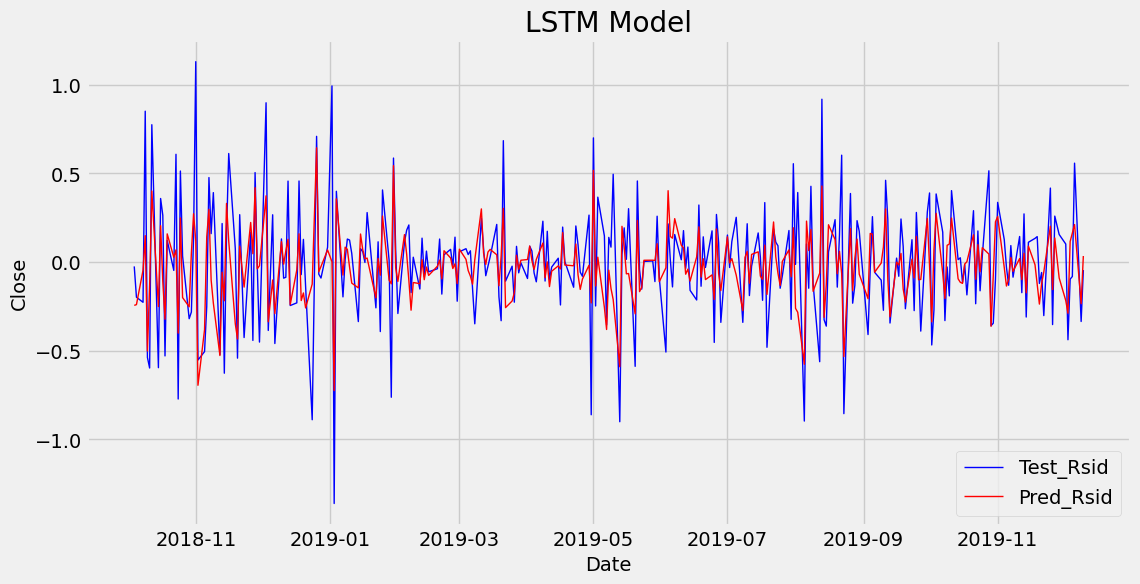

In [19]:
data_range=y_test.index
plt.figure(figsize=(12, 6))
plt.title("LSTM Model")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close", fontsize=14)
plt.plot(data_range,y_test,"blue", linewidth=1)
plt.plot(data_range,pred,"red",linewidth=1)
plt.legend(["Test_Rsid", "Pred_Rsid"], loc="lower right")
plt.show()

Hybride Model


In [20]:
pred_arima = np.array(prediction[:-1])
pred_lstm = pred
seaonal_pred = data_decompose.seasonal.values[1:-1]
seaonal_pred = np.array(seaonal_pred[len_data_train:])
seaonal_pred = seaonal_pred.reshape(298,1)
pred_hyb = pred_arima+pred_lstm + seaonal_pred

actual = df[1:-1]
actual =actual[len_data_train:]

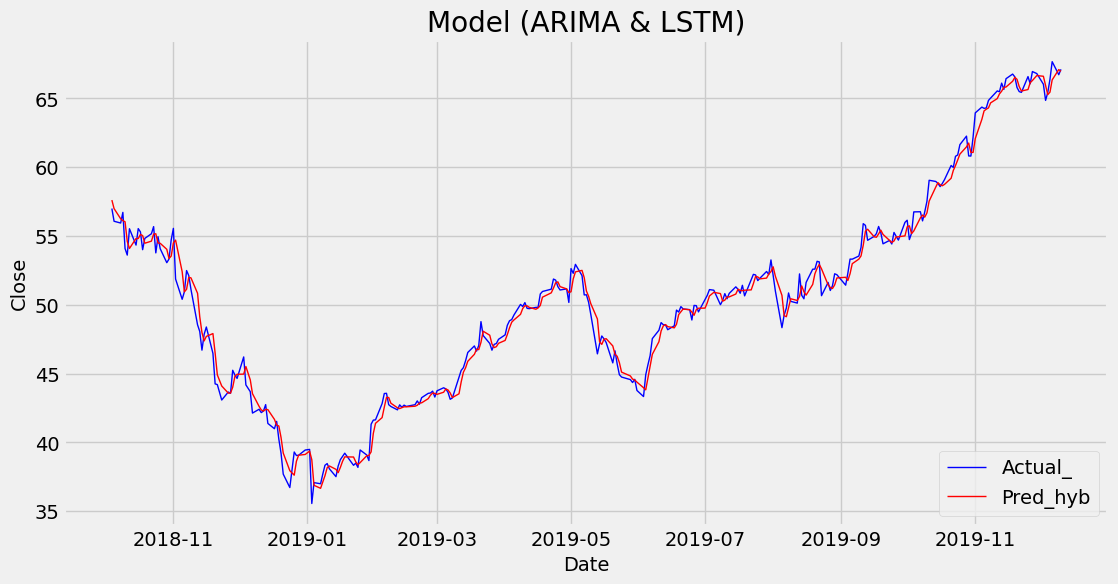

In [21]:
date_range = y_test.index
plt.figure(figsize=(12, 6))
plt.title("Model (ARIMA & LSTM)")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close", fontsize=14)
plt.plot(data_range,actual,"blue", linewidth=1)
plt.plot(data_range,pred_hyb,"red",linewidth=1)
plt.legend(["Actual_", "Pred_hyb"], loc="lower right")
plt.show()

In [22]:
print(f"MAE : {mean_absolute_error(actual,pred_hyb)}")
print(f"MSE : {mean_squared_error(actual,pred_hyb)}")

MAE : 0.5770360796264157
MSE : 0.6030135239297164
